In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

In [20]:
sample_size = 50
width = 50
height = 50

In [21]:
files = []
adress = '/kaggle/input/fruits/fruits-360/Training/{}'
os.chdir('/kaggle/input/fruits/fruits-360/Training')
for i in os.listdir(os.getcwd()):
    files.append(i)

In [22]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

In [23]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Tomato 2
Calculate Time 8.41652


In [24]:
start = time.time()
image_data_test = []
image_target_test = []

for title in files:
    os.chdir(adress.format(title))
    sayac = 0
    for i in data[title][sample_size:]:
        img = cv2.imread(i)
        image_data_test.append(cv2.resize(img,(width, height)))
        image_target_test.append(title)
        sayac += 1
        if sayac == 50:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Tomato 2
Calculate Time 8.47239


In [25]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(6550, 50, 50, 3)

In [26]:

image_data_test = np.array(image_data_test)
size = image_data_test.shape[0]
image_data_test.shape

(6550, 50, 50, 3)

# Data Visualization

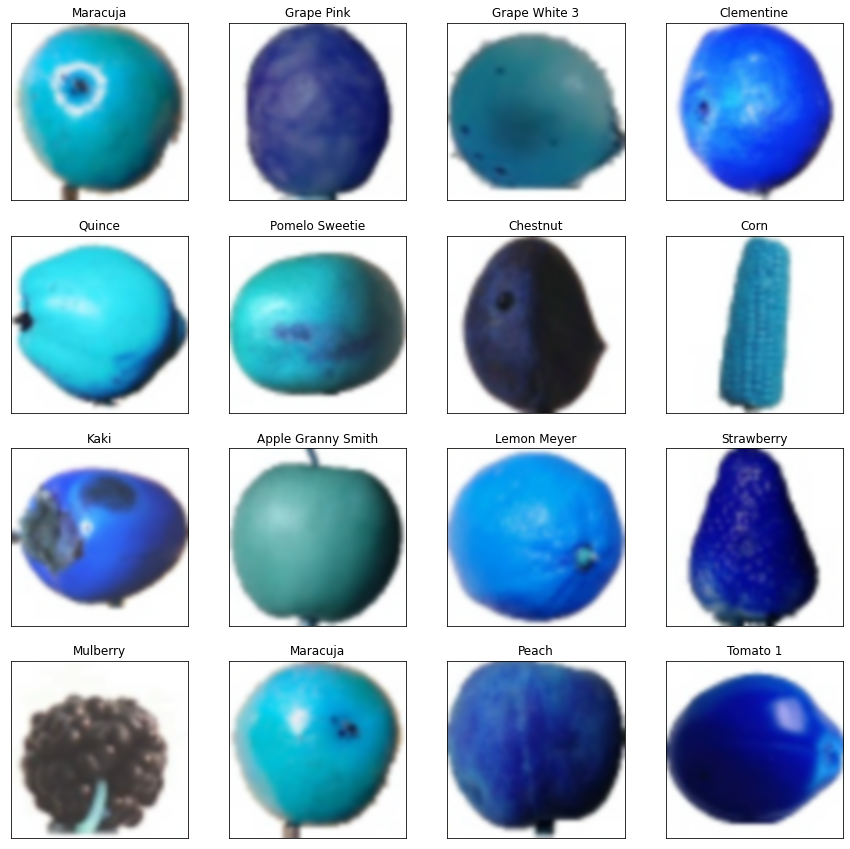

In [27]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(1,size+1))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig], cmap="gray", origin='upper', interpolation = 'bicubic')
    plt.title(image_target[fig])
    plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
del image_data, image_target
del image_data_test, image_target_test
del files, data

# Data processing et Utilisation de ResNet

# ResNet

In [29]:
import os
import pickle
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import torchvision.models as models

In [30]:
# Load the directory paths to the dataset
DATA_DIR = '/kaggle/input/fruits/fruits-360'
TRAIN_DIR = DATA_DIR + '/Training'
TEST_DIR = DATA_DIR + '/Test'

In [31]:
train_tfms = tt.Compose([tt.RandomCrop(100, padding=10, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(),
                         tt.RandomRotation(20),
                         tt.ToTensor()
                         ])
valid_tfms = tt.Compose([tt.ToTensor()])

In [32]:
train_ds = ImageFolder(TRAIN_DIR, train_tfms)
valid_ds = ImageFolder(TEST_DIR, valid_tfms)

In [33]:
#train_ds = torch.utils.data.Subset(train_dataset, np.random.choice(len(train_dataset), 250, replace=False))

In [34]:
valid_ds.classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [35]:
#pickle.dump(valid_ds.classes, open("fruits-classes.pkl", "wb"))

In [36]:
batch_size_custom = 32      # Batch size for custom CNN model
batch_size_resnet = 32     # Batch size for resnet CNN model
random_seed = 42
torch.manual_seed(random_seed);

In [37]:
# DataLoaders for ResNet CNN Model
train_dl_resnet = DataLoader(train_ds, batch_size_resnet, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_resnet = DataLoader(valid_ds, batch_size_resnet*2, num_workers=3, pin_memory=True)

In [38]:
# DataLoaders for Custom CNN Model
train_dl_custom = DataLoader(train_ds, batch_size_custom, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_custom = DataLoader(valid_ds, batch_size_custom*2, num_workers=3, pin_memory=True)

## Using the GPU

In [39]:
torch.cuda.is_available() # check if GPU is available

True

In [40]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [41]:
# Device Data Loader for Custom ResNet Model
train_dl_resnet = DeviceDataLoader(train_dl_resnet, device)
valid_dl_resnet = DeviceDataLoader(valid_dl_resnet, device)

## Define the model

In [42]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        images, labels = images.cuda(), labels.cuda()
        out = self(images)                      
        loss = F.cross_entropy(out, labels)                   # Calculate training loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        images, labels = images.cuda(), labels.cuda()
        out = self(images)                                    # Generate predictions
        loss = F.cross_entropy(out, labels)                   # Calculate validation loss
        acc = accuracy(out, labels)                           # Calculate accuracy
        return {'val_loss': loss.detach(),  'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()         # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()            # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.10f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

### ResNetCNN

In [43]:
class ResNetCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)     # You can change the resnet model here
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 131)          # Output classes
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

### Custom CNN

In [44]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels),     # Batch Normalization
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class CustomCNN(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)                                 # 3 x 100 x 100 ->
        self.conv2 = conv_block(128, 256, pool=True)                              # 128 x 100 x 100 ->
        self.res1 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))     # 256 x 50 x 50 ->
        
        self.conv3 = conv_block(256, 512, pool=True)                              # -> 512 x 25 x 25
        self.conv4 = conv_block(512, 1024, pool=True)                             # -> 1024 x 12 x 12
        self.res2 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024)) # -> 1024 x 12 x 12
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),                          # -> 1024 x 3 x 3
                                        nn.Flatten(),                             # -> 9216
                                        nn.Linear(9216, num_classes))             # -> 131
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out    # Residual Block 
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out    # Residual Block
        out = self.classifier(out)
        return out

        # remove the + out to see the differences of adding the output at the end

### Simple CNN

In [45]:
class SimpleCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.res = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,
                    kernel_size=3, stride=1, padding=1),  # 3 x 100 x 100 -> 32 x 100 x 100
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1, 1),  # bs x 32 x 100 x 100 -> 64 x 100 x 100
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, 1, 1),  # bs x 64 x 100 x 100 -> 128 x 100 x 100
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, 2, 1),  # bs x 128 x 100 x 100 -> 256 x 50 x 50
            nn.ReLU(),
            nn.Conv2d(256, 512, 3, 2, 1),  # bs x 256 x 50 x 50 -> 512 x 25 x 25
            nn.ReLU(),
            nn.Conv2d(512, 1024, 3, 2, 1),  # bs x 512 x 25 x 25 -> 1024 x 12 x 12
            nn.ReLU(),
            nn.MaxPool2d(4),                          # -> 1024 x 3 x 3
            nn.Flatten(),                             # -> 9216
            nn.Linear(9216, 131)
        )
    
    def forward(self, xb):
        out = self.res(xb)
        return out


## Train the model

In [46]:
@torch.no_grad()
def evaluate(model, val_loader):
    print('Evaluating Model ...')
    model.eval()
    outputs = [model.validation_step(batch) for batch in tqdm(val_loader)]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        print('\nTraining Model ...')
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [47]:
epochs = 5
max_lr = 1e-3
grad_clip = 1e-1
weight_decay = 1e-4
opt_func = torch.optim.Adam

### ResNet model training

In [48]:
resnet_model = to_device(ResNetCNN(), device)
resnet_model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

ResNetCNN(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [49]:
history_ResNetCNN = [evaluate(resnet_model, valid_dl_resnet)]
history_ResNetCNN

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

[{'val_loss': 4.886735439300537, 'val_acc': 0.004885563161224127}]

In [50]:
resnet_model.freeze()

In [51]:
%%time
history_ResNetCNN += fit_one_cycle(3, max_lr, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0009944154, train_loss: 4.0048, val_loss: 3.9593, val_acc: 0.7156

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0004626371, train_loss: 3.9229, val_loss: 3.9051, val_acc: 0.9165

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0000000040, train_loss: 3.8969, val_loss: 3.8945, val_acc: 0.9819
CPU times: user 8min 25s, sys: 18.6 s, total: 8min 44s
Wall time: 9min 44s


In [52]:
resnet_model.unfreeze()

In [53]:
%%time
history_ResNetCNN += fit_one_cycle(3, max_lr, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0009944154, train_loss: 3.9157, val_loss: 3.9309, val_acc: 0.8797

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0004626371, train_loss: 3.9113, val_loss: 3.9017, val_acc: 0.9626

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0000000040, train_loss: 3.8950, val_loss: 3.8938, val_acc: 0.9813
CPU times: user 8min 24s, sys: 17.1 s, total: 8min 41s
Wall time: 9min 37s


### Custom CNN model

In [54]:
input_channels = 3
output_classes = 131 

custom_model = to_device(CustomCNN(input_channels, output_classes), device)
custom_model

CustomCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpla

In [55]:
for images, labels in train_dl_custom:
    print('images.shape:', images.shape)
    out = custom_model(images.cuda())
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 100, 100])
out.shape: torch.Size([32, 131])
out[0]: tensor([-1.0378,  1.2741, -0.0648,  0.5386, -3.8411, -0.1334, -4.0145, -3.4827,
         0.9134, -2.4962, -1.8446, -1.2663, -3.1321,  0.3519, -0.3875, -0.8509,
         1.8609, -0.3874, -0.0057,  0.8274,  3.2790,  4.3733, -1.5179,  0.3137,
        -0.4943,  0.6521, -0.0865, -0.1909,  1.4817,  0.1467,  0.8305, -0.6192,
        -2.5908, -1.2708, -0.8835, -0.2038, -0.6310, -0.6906, -3.6180, -0.1017,
        -0.6023, -4.0770, -2.5188,  0.4429,  4.0853, -0.6614,  0.6501, -0.2289,
        -0.6467, -1.8532,  1.6841, -0.1988,  0.8696, -0.1347,  1.4560,  0.6438,
         0.8036, -0.8715, -1.2260, -0.7783, -1.7163,  3.3769,  0.5831,  1.3639,
        -1.1569,  2.0012, -2.9426,  0.6177,  2.8586,  1.4756, -1.1715,  4.4385,
        -3.8212, -0.7953, -2.4651, -0.7135, -1.8995,  0.2873,  0.6100, -2.2255,
        -1.1014, -2.1961, -0.2793,  2.3965, -0.1889,  3.6020, -2.7773, -1.2268,
         1.1725, -1.8470, -1.1111, 

In [56]:
history_CustomCNN = [evaluate(custom_model, valid_dl_custom)]
history_CustomCNN

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

[{'val_loss': 4.875147819519043, 'val_acc': 0.00620598578825593}]

In [57]:
%%time
history_CustomCNN += fit_one_cycle(epochs, max_lr, custom_model, train_dl_custom, valid_dl_custom, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0007598628, train_loss: 0.9381, val_loss: 0.2880, val_acc: 0.9187

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0009504846, train_loss: 0.1400, val_loss: 0.0904, val_acc: 0.9761

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0006112620, train_loss: 0.0752, val_loss: 0.1165, val_acc: 0.9730

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.0001882583, train_loss: 0.0336, val_loss: 0.0463, val_acc: 0.9915

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.0000000040, train_loss: 0.0029, val_loss: 0.0394, val_acc: 0.9926
CPU times: user 1h 23min 27s, sys: 27 s, total: 1h 23min 54s
Wall time: 1h 24min


### SimpleCNN

In [58]:
simple_model = to_device(SimpleCNN(), device)
simple_model

SimpleCNN(
  (res): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=9216, out_features=131, bias=True)
  )
)

In [59]:
history_SimpleCNN = [evaluate(simple_model, valid_dl_custom)]
history_SimpleCNN

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

[{'val_loss': 4.875166416168213, 'val_acc': 0.00730633782222867}]

In [60]:
%%time
history_SimpleCNN += fit_one_cycle(epochs, max_lr, simple_model, train_dl_custom, valid_dl_custom, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [0], last_lr: 0.0007598628, train_loss: 1.3688, val_loss: 0.4624, val_acc: 0.8676

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.0009504846, train_loss: 0.2665, val_loss: 0.3560, val_acc: 0.9211

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.0006112620, train_loss: 0.0941, val_loss: 0.1250, val_acc: 0.9736

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.0001882583, train_loss: 0.0217, val_loss: 0.0865, val_acc: 0.9841

Training Model ...


  0%|          | 0/2116 [00:00<?, ?it/s]

Evaluating Model ...


  0%|          | 0/355 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.0000000040, train_loss: 0.0024, val_loss: 0.0770, val_acc: 0.9873
CPU times: user 37min 24s, sys: 26.2 s, total: 37min 50s
Wall time: 38min 7s


## Predictions

In [61]:
def plot_accuracies(history, model_name):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(model_name + ' - Accuracy vs. No. of epochs');

def plot_losses(history, model_name):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title(model_name + ' - Loss vs. No. of epochs');

def plot_lrs(history, model_name):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title(model_name + ' - Learning Rate vs. Batch no.');

### ResNetCNN

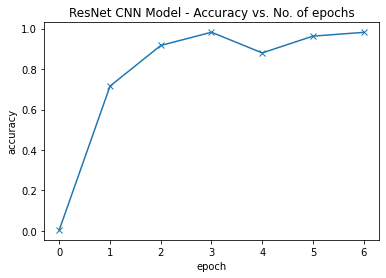

In [62]:
plot_accuracies(history_ResNetCNN, 'ResNet CNN Model')

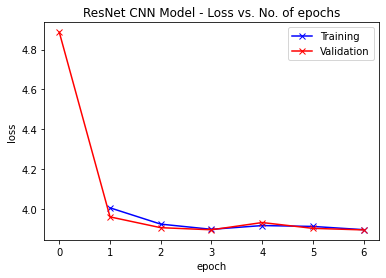

In [63]:
plot_losses(history_ResNetCNN, 'ResNet CNN Model')

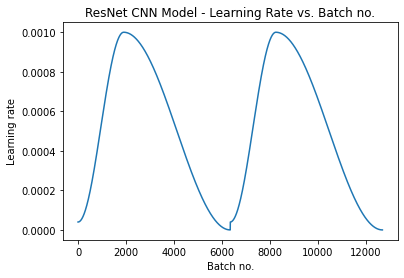

In [64]:
plot_lrs(history_ResNetCNN, 'ResNet CNN Model')

### CustomCNN

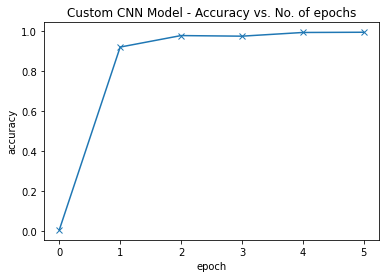

In [65]:
plot_accuracies(history_CustomCNN, 'Custom CNN Model')

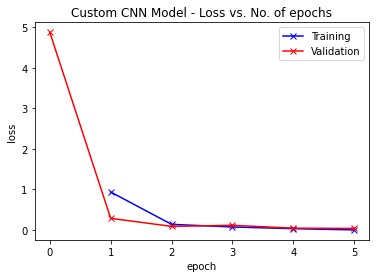

In [66]:
plot_losses(history_CustomCNN, 'Custom CNN Model')

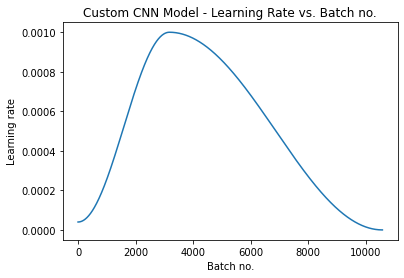

In [67]:
plot_lrs(history_CustomCNN, 'Custom CNN Model')

### SimpleCNN

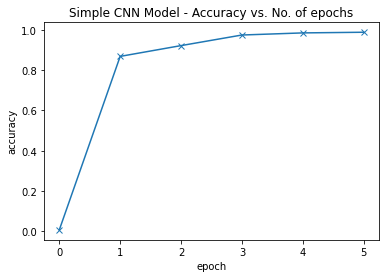

In [68]:
plot_accuracies(history_SimpleCNN, 'Simple CNN Model')

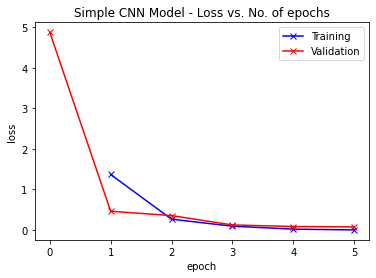

In [69]:
plot_losses(history_SimpleCNN, 'Simple CNN Model')

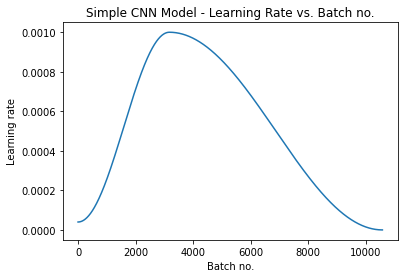

In [70]:
plot_lrs(history_SimpleCNN, 'Simple CNN Model')

In [71]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return valid_ds.classes[preds[0].item()]

Label: Apple Crimson Snow , Predicted: Apple Crimson Snow


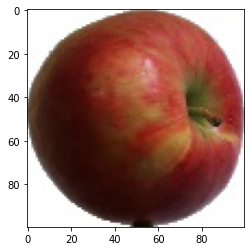

In [72]:
img, label = valid_ds[256]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

In [77]:
torch.save(resnet_model.state_dict(), '/kaggle/working/fruits-360-resnet.pth')

Label: Lemon Meyer , Predicted: Lemon Meyer


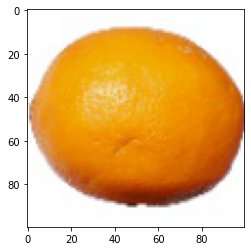

In [78]:
img, label = valid_ds[10255]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, custom_model))

In [80]:
torch.save(custom_model, '/kaggle/working/fruits-360-customcnn.pth')

Label: Apple Pink Lady , Predicted: Apple Pink Lady


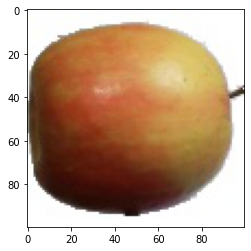

In [81]:
img, label = valid_ds[1055]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, simple_model))

In [82]:
torch.save(simple_model, '/kaggle/working/fruits-360-simplecnn.pth')